#  SONAR Rock Vs. Mine Prediction
***

The objective of this project is to design and develop a sonar-based system that can accurately detect and differentiate between underwater mines and rocks. The system should be able to detect the presence of an object, classify it as either a mine or a rock, and provide accurate location information.

<img src="mines.jpeg" width="1200" height="400">
***

***
## STEP 1 : IMPORTING THE DATASET
***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [3]:
df

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


***
## STEP 2 : DATA EXPLORATION
***

In [4]:
df['Label'] = df['Label'].map({'R': 0, 'M': 1}).astype('float64')

<Axes: >

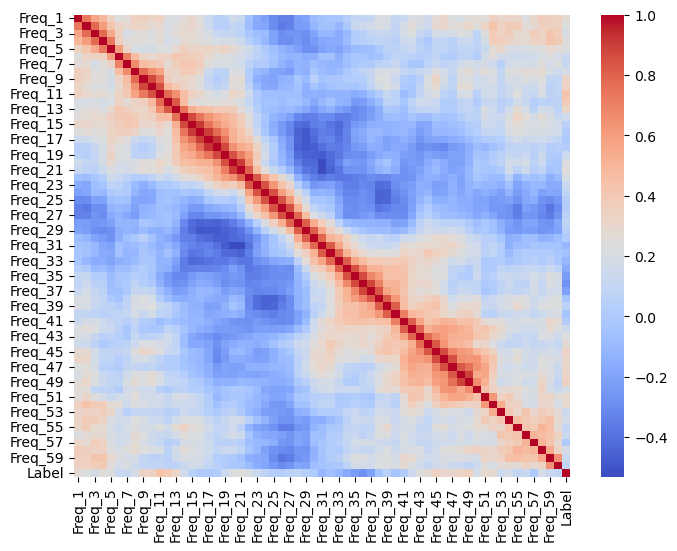

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm')

In [6]:
df.corr()['Label'].sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

In [7]:
df.corr()['Label'].sort_values().head(6)

Freq_36   -0.269151
Freq_35   -0.227670
Freq_37   -0.209055
Freq_34   -0.172010
Freq_31   -0.110728
Freq_33   -0.107184
Name: Label, dtype: float64

***
## STEP 3 : TRAIN TEST SPLIT
***

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
X = df.drop(['Label'],axis=1)
y = df['Label']

In [10]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

***
## STEP 4 : TRAINING THE MODEL
***

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [12]:
scaler = StandardScaler()

In [13]:
knn = KNeighborsClassifier()

In [15]:
operations = [('scaler',scaler),('knn',knn)]

In [14]:
from sklearn.pipeline import Pipeline

In [16]:
pipe = Pipeline(operations)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
k_values = list(range(1,30))

In [19]:
param_grid = {'knn__n_neighbors': k_values}

In [20]:
CV_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [21]:
CV_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [22]:
CV_classifier.best_params_

{'knn__n_neighbors': 1}

In [27]:
pred = CV_classifier.predict(X_test)

***
## STEP 5 : TESTING THE MODEL
***

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
confusion_matrix(y_test,pred)

array([[ 7,  1],
       [ 1, 12]])

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88         8
         1.0       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

